<a href="https://colab.research.google.com/github/MrRuicy/colab/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多层感知机（MLP）

使用 torchvision.datasets 下载 MNIST

用 DataLoader 批次加载数据

自定义网络结构继承 nn.Module

用 torch.optim.Adam 进行优化

使用 GPU 加速

输出训练损失、准确率，并可视化部分结果

Using device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 20.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.42MB/s]


MLP(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
  )
)
Epoch [1/5], Loss: 0.3741
Epoch [2/5], Loss: 0.1794
Epoch [3/5], Loss: 0.1293
Epoch [4/5], Loss: 0.1035
Epoch [5/5], Loss: 0.0831
Test Accuracy: 97.16%


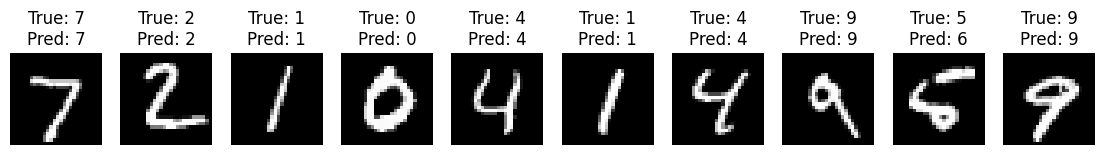

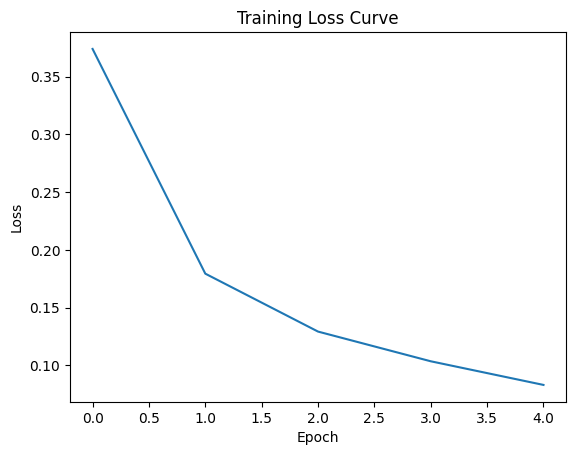

In [ ]:
# ========== 1. 导入库 ==========
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ========== 2. 检查设备 ==========
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ========== 3. 数据加载 ==========
# 数据预处理：将图像转换为Tensor并归一化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 下载和加载训练/测试数据集
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)

# DataLoader 按批加载数据
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=100, shuffle=False)

# ========== 4. 定义模型 ==========
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),         # 将输入28x28展开为长度784
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 10)    # 输出10类
        )

    def forward(self, x):
        return self.model(x)

model = MLP().to(device)
print(model)

# ========== 5. 定义损失和优化器 ==========
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ========== 6. 训练模型 ==========
num_epochs = 5
loss_history = []

for epoch in range(num_epochs):
    epoch_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和参数更新
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# ========== 7. 测试评估 ==========
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# ========== 8. 可视化部分结果 ==========
def show_sample_predictions():
    images, labels = next(iter(test_loader))
    images, labels = images[:10].to(device), labels[:10].to(device)
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, 10, figsize=(14, 2))
    for i in range(10):
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')
        axes[i].set_title(f"True: {labels[i].item()}\nPred: {preds[i].item()}")
        axes[i].axis('off')
    plt.show()

show_sample_predictions()

# ========== 9. 损失曲线 ==========
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


打印模型结构
展示你定义的 MLP（输入784 → 256 → 10 分类）

训练过程
每个 epoch 会打印平均损失，表现优化趋势

测试准确率
最终会输出测试集上的分类准确率，通常在 92%~95% 左右

可视化分类
随机展示 10 张测试图片，并对比真实标签和预测值

损失曲线
帮助你观察训练过程中模型是否正常收敛

#卷积神经网络（CNN）

nn.Conv2d 提取图像局部特征

nn.MaxPool2d 降低维度，加速训练并增强鲁棒性

卷积神经网络使用 通道数 来刻画滤波器的数量

更深的网络通过多层卷积逐步提取特征，最后使用线性层进行分类

Using device: cuda


100%|██████████| 9.91M/9.91M [00:00<00:00, 18.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.68MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.38MB/s]


CNN(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
Epoch [1/5], Loss: 0.2673
Epoch [2/5], Loss: 0.0649
Epoch [3/5], Loss: 0.0461
Epoch [4/5], Loss: 0.0351
Epoch [5/5], Loss: 0.0286
Test Accuracy: 98.88%


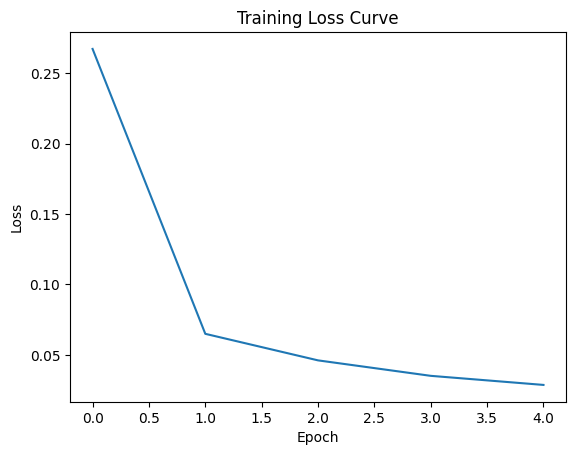

In [1]:
# ========== 1. 导入必要库 ==========
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# ========== 2. 设置设备 ==========
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ========== 3. 数据准备 ==========
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

# ========== 4. 定义 CNN 模型 ==========
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1), # 输入通道1，输出通道16
            nn.ReLU(),
            nn.MaxPool2d(2, 2),              # 尺寸从28x28 -> 14x14
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)               # 尺寸从14x14 -> 7x7
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)               # 输出10类
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = CNN().to(device)
print(model)

# ========== 5. 定义损失函数和优化器 ==========
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ========== 6. 训练过程 ==========
num_epochs = 5
loss_history = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# ========== 7. 测试集评估 ==========
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# ========== 8. 可视化 Loss 曲线 ==========
plt.plot(loss_history)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
